<a href="https://colab.research.google.com/github/pmalves/coach-report-lv1/blob/main/Dossier_de_Est%C3%A1gio_Pedro_Alves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Initialização

# from pickle import FALSE
# Install the required libraries
# !pip install google-auth-oauthlib==1.2.0 google-auth-httplib2==0.1.1 google-api-python-client==2.116.0

# Import necessary libraries
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from IPython.display import Markdown, display
import re
import google
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# (If you want to use your personal account instead of a service account, use this method. The first time you will be asked to authenticate via Google)
from google.colab import auth
auth.authenticate_user()
creds = google.auth.default()[0]

# Step 2: Get the Google Sheet ID
# Replace with your Google Sheet ID
SPREADSHEET_ID = '1OMSrvA2ZWcH05i2w9FoFw2axjeIf0-3ME5btbbctn0U'

# Step 3: Build Google Sheet Service
service = build('sheets', 'v4', credentials=creds)

# Step 4: Get data from Google Sheet
# Replace 'Sheet1' with the name of the sheet you want to access. You can also specify a range of data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range="'Atletas'!B5:F24").execute()
values = result.get('values')

# Step 5: Create Pandas DataFrame
athletes_data = pd.DataFrame(values[1:], columns=values[0])

# Contextualização


## Treinador

* Nome: Pedro Alves
* Idade: 47 anos

Pratico voleibol há 30 anos, podendo dizer-se que tenho uma folha de resultados exímia! Isto, claro, se por exímia quisermos dizer que essa folha está em branco, sendo que a "carreira" foi inteiramente passada na 3a divisão e no campeonato Inatel. Recentemente, troquei o pavilhão pela praia, já que a carrocaria não apresenta as condições necessárias para jogar em pavilhão. Infelizmente, o talento na areia faz antever que a folha de resultados desportivos ser manterá, como está, imaculada.

A experiência como treinador é praticamente nula; A ideia inicial de _"vem dar um apoio aos treinos das tuas filhas"_ no intervalo da função inevitável de _Uber-daddy_ transformou-se em _"ah, espera, afinal vais ser treinador das iniciadas"_.

Um mês depois tinha concluído a fase inicial do curso de Treinadores de Grau I e estava responsável por 14 miúdas que jogavam há menos de 6 meses, queriam ser federadas, mas nem servir sabiam.

Como elemento francamente positivo, denoto o aspecto motivacional de que muito dificilmente serei pior treinador do que fui jogador.


## Clube

![GDUE](https://github.com/pmalves/coach-report-lv1/blob/main/images/gdue-logo.png?raw=true)


O **Grupo Desportivo União Ericeirense (GDUE)** é uma associação desportiva com sede na vila de Ericeira, Portugal. Fundado com o objetivo de promover o desporto e a integração comunitária, o clube oferece uma estrutura organizada para diversas modalidades desportivas, incluindo voleibol. Com forte ligação à comunidade local, o GDUE é reconhecido pelo desenvolvimento de atletas e pela participação em competições regionais e nacionais.

O “sonho” dos promotores desta iniciativa é fazer desta modalidade, o voleibol, a mais praticada no concelho de Mafra e contribuir para o engrandecimento do GDUE e desenvolvimento do desporto e promover de hábitos de vida saudável.
Nesse sentido são objetivos estratégicos o lançamento faseado do voleibol federado, do voleibol não federado e do voleibol “social” em pavilhão e lançar as bases para o “beach volley”. Serão ainda lançadas iniciativas com o objetivo de divulgar a existência da modalidade e atrair novos praticantes.


Em 2024 foram inscritas as seguintes equipas na AVL:

* Júniores (Fem)
* Cadetes (Fem)
* Iniciadas (Fem)
* Minis (Fem)

## Estrutura Logística

![Escola da Carvoeira](https://github.com/pmalves/coach-report-lv1/blob/main/images/carvoeira.jpg?raw=true)


Os treinos e jogos são feitos no pavilhão da Escola EB1/JI da Freguesia da Carvoeira.

Como apanágio em Portugal para todos os clubes que estão a iniciar, foram-nos dadas todas as condições ideais para a prática e... estava a brincar. O pavilhão da escola é pequeno, apenas com espaço para uma rede, e foi-nos atribuído um número reduzidíssimo de horários para distribuir pelas 4 equipas.

Na maior parte dos dias, um tempo de treino de 90 minutos inclui apenas 60 minutos de rede, sendo que nos últimos 30 minutos do treino já está outra equipa em aquecimento.

Toda a estrutura do treino teve de ser adaptada a estas condições.

## Campeonato

O Ericeirence encontra-se a disputar o [Campeonato Regional de Iniciados Femininos, Divisão B, 1a Fase](https://www.avlisboa.pt/competi%C3%A7%C3%B5es/campeonatos-regionais/campeonatos-regionais-2024-20245/table/250-1a-fase-camp-nacional-camp-regionais-2024-2025-iniciados-femininos-divisao-b-1a-fase.html). Poderia extender-me na descrição dos enormíssimos benifícios pessoais, profissionais e sócio-económicos que advêm da participação naquele que é provavelmente o evento desportivo mais bem organizado do planeta, mas como muito possivelmente isto vai ser lido por pessoas da AVL, tenho receio que a minha capacidade linguística não esteja à altura, pelo que não vou nem tentar.


## Atletas

Segue-se uma descrição sobre o perfil e distribuição das atletas.


In [ ]:
# @title Listagem
test_name = ""

# Some cleaning - Convert 'Nr' and 'Data Nascimento' column to numeric, handling errors by coercing to NaN and filling with 0
athletes_data['Nr'] = pd.to_numeric(athletes_data['Nr'], errors='coerce').fillna(0).astype(int)
athletes_data['Data Nascimento'] = pd.to_numeric(athletes_data['Data Nascimento'], errors='coerce').fillna(0).astype(int)

athletes_table = athletes_data[['Nr', 'Atleta', 'Posição','Data Nascimento']].sort_values(by='Nr')

athletes_table_md = athletes_table.to_markdown(index=False)

total_athletes = len(athletes_data)

# Calculate number of athletes per 'Data Nascimento'
athletes_per_birthdate = athletes_data.groupby('Data Nascimento',).size()

# Step 5: Calculate number of athletes per 'Posição'
athletes_per_position = athletes_data.groupby('Posição').size()

# Step 6: Create formatted Markdown string
athletes_description_md = f"""

### Tabela de Atletas ({len(athletes_data)} atletas)

{athletes_table_md}


"""

display(Markdown(athletes_description_md))




### Tabela de Atletas (19 atletas)

|   Nr | Atleta            | Posição   |   Data Nascimento |
|-----:|:------------------|:----------|------------------:|
|    3 | Inês              | Passadora |              2010 |
|   10 | Leonor Ferreira   | Entrada   |              2010 |
|   11 | Sofia             | Central   |              2011 |
|   12 | Pietra            | Entrada   |              2012 |
|   13 | Matilde           | Entrada   |              2010 |
|   14 | Carolina Antunes  | Passadora |              2011 |
|   17 | Salomé            | Entrada   |              2010 |
|   18 | Maria N           | Central   |              2010 |
|   19 | Lia               | Central   |              2011 |
|   20 | Beatriz           | Entrada   |              2010 |
|   24 | Alice Alves       | Saída     |              2010 |
|   25 | Emilia            | Central   |              2011 |
|   26 | Alice Simões      | Saída     |              2010 |
|   28 | Leonor Anjos      | Entrada   |              2010 |
|   32 | Ema               | Entrada   |              2010 |
|   38 | Mafalda           | Saída     |              2011 |
|   86 | Carolina Ferreira | Central   |              2010 |
|   88 | Joana Domingues   | Saída     |              2010 |
|   99 | Margarida         | Central   |              2011 |




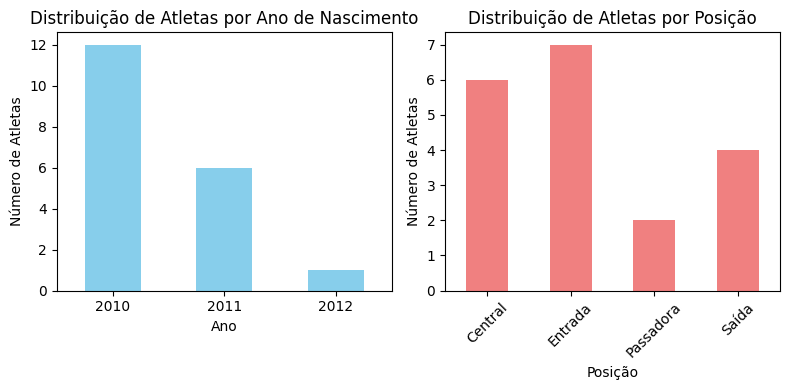

In [ ]:
#@title Distribuição por Ano de Nascimento e Posição

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

athletes_per_birthdate.plot(kind='bar', color='skyblue', ax=ax[0]); # Generate the chart
ax[0].set_title('Distribuição de Atletas por Ano de Nascimento') # Set the title
ax[0].set_xlabel('Ano') # Set x-axis label
ax[0].set_ylabel('Número de Atletas') # Set y-axis label
ax[0].tick_params(axis='x', rotation=0, labelrotation=0) # Rotates labels on the x axis

# Overlaying the normal distribution curve
birth_years = athletes_per_birthdate.index.to_numpy()

mean_birth_year = np.mean(birth_years)
std_birth_year = np.std(birth_years)

# Generate x values for the normal distribution curve, with some padding for better visualization
x = np.linspace(birth_years.min() - 1, birth_years.max() + 1, 50)
y = norm.pdf(x, mean_birth_year, std_birth_year)

# Scale the normal distribution curve to the bar chart's y-axis values, with some padding
y_scaled = y * athletes_per_birthdate.max() * 2


ax[0].plot(x, y_scaled, color='red', label='Normal Distribution', linestyle='--')
# ax[0].legend()

# # Step 6: Create position chart
athletes_per_position.plot(kind='bar', color='lightcoral', ax=ax[1]); # Generate the chart
ax[1].set_title('Distribuição de Atletas por Posição') # Set the title
ax[1].set_xlabel('Posição') # Set x-axis label
ax[1].set_ylabel('Número de Atletas') # Set y-axis label
ax[1].tick_params(axis='x', rotation=45, labelrotation=45 ) # Rotates labels on the x axis

plt.tight_layout(); # Adjust the layout to fit everything in the chart
plt.show()


De notar que a indicação sobre posições não é de todo vinculativa, e tem mudado com o tempo. Essa indicação é apenas útil para fazer o planemento dos jogos e das formações.

# Treinos: Filosofia e Abordagem


## Contexto

O Ericeirense contou com a inscrição de um elevado número de atletas dos anos 2009 a 2011 - aproximadamente 35 atletas. Tomou-se a decisão de criar duas equipas:

* Uma equipa de cadetes, com as atletas de 2009 e as mais experientes de 2010

* Uma equipa de iniciadas, com as menos experientes de 2010 e as de 2011

Neste contexto, com atletas que nunca tiveram qualquer contacto com a competição e com menos de 6 meses de voleibol, o foco está claramente na formação e não nos resultados.


## Filosofia de Treino e Jogo

Aqui estão alguns dos principais fundamentos que regem a filosofia dos treinos. Sou o primeiro a admitir que com mais experiência alguns destes possam mudar, mas é o ponto de partida que utilizei.


> _Apostar nos fundamentos_

Estas recém-atletas vêm ou com lacunas técnicas ou já com vícios que se tornam difíceis de tirar. Desde fazerem a plataforma com a mão aberta a [não] fazer a chamada com os braços no ar, a evolução só acontece com muita correção e muita prática.

A última coisa que queremos são atletas que só quase aos 50 anos é que tentam aprender a fazer um passe, como um certo central que me vem à memória assim de repente.

> _Desenvolvimento individual acima do resultado desportivo_

O meu objectivo é que as miúdas aprendam a jogar voleibol. Um exemplo que lhes dou e que me parece representativo: Prefiro que elas falhem um remate do que acertem um passe para o outro lado da rede ao terceiro toque.

No longo prazo podemos perder muitos pontos mas ganhamos jogadoras.


> _Maior aposta na componente técnica do que na componente tática_

Não considero a componente tática nesta fase uma prioridade, quando comparado com a componente técnica. A principal razão é a seguinte: quando treinamos componente tática, pela natureza do trabalho,[normalmente] temos apenas uma bola no ar para 12-14 jogadoras.

Ora, o que elas precisam nesta fase é contacto com a bola. O meu objectivo é, em cada excercício, ter o maior número possível de bolas no ar, com campo dividido em 2, 3 ou em formatos mais dinâmicos como _King of the Court_.

O ponto principal para praticar a componente táctica... são os próprios jogos. Nesta fase claramente encaro os jogos como um $4^o$ treino semanal.


> _Implementar modelos de jogo avançados_

Este fundamento pode parecer um contra-senso em relação ao anterior, mas passo a explicar; Com tempo limitado para a parte tática, a minha opção foi a de "curto-circuitar" modelos táticos intermédios. Passei todos os modelos de jogo "temporários" (6-0, 4-2, outras variantes), e em 5 semanas coloquei a equipa a jogar no modelo de 5-1.

Durante o curso de treinadores de nível I, o Professor Jorge Infante referiu algo que fez sentido para mim na altura: _"Não faz sentido evoluir do sistema 6-0 enquanto a equipa não conseguir colocar a receção no sítio certo"_. No entanto, optei por uma abordagem diferente: Coloquei as miúdas a aprender as trocas, penetrações e movimentos para jogar em 5-1. Elas podem não conseguir colocar uma receção no sítio... mas quando conseguirem, as peças vão encaixar no sítio e já saberão o que fazer.

Esta opção é também resultado de experiência pessoal. Quando jogava nos iniciados/juvenis do Benfica, no distante ano de 1783, tínhamos uma equipa tecnicamente avançada, e jogávamos várias vezes contra uma equipa do Sporting que metia medo no ataque à rede, mas como não davam uma para a caixa na receção e na defesa, levavam consistentemente 3-0. O problema foi que eles eventualmente aprenderam a receber e a defender; toda a nossa vantagem se desvaneceu, deixamos de lhes conseguir ganhar e eventualmente essa equipa conseguiu um título nacional.

Daí a opção de avançar rapidamente pelos diferentes modelos:

* Primeiro jogo foi em 6-0
* Segundo jogo foi em 4-2 símples apenas com transição do distribuidor para a zona 3
* Terceiro jogo em 4-2 símples com transição dos defesas para as posições deles (entradas na 6, centrais na 5, passador na 1). De notar que nesta altura as jogadoras ainda não sabiam que já estavam a se preparar para fazer posições fixas
* Quarto jogo em 4-2 símples com posições fixas
* Quinto e seguintes em 5-1 com passador na 3 e na 1
* Segunda fase do campeonato em 5-1 com passador na 2 e na 1

Dois pontos que se tornaram claros para mim durante este perído:

* Quem faz isto de olhos fechados há 30 anos já se esqueceu o quão complexo isto é para quem nunca fez isto.
* Depois de uns períodos absolutamente caóticos com as miúdas a fazer reboot no meio dos pontos, foi impressionante ver, que quando as coisas "encaixaram", a facilidade com que elas agora fazem as coisas.


> _Generalização em treinos, especialização em jogos_

Este axioma veio no decorrer de algumas semanas de treinos e jogos. Inicialmente estava contra qualquer tipo de especialização precoce, e apesar de ainda ser um princípio que sigo, a minha abordagem é agora um pouco menos restritiva.

**Em treino**, e como referido, há uma aposta maior sobre a componente técnica. Aí, todas as atletas passam por todas as fases de jogo: Serviço, receção, passe, ataque, defesa e bloco (mesmo quem tem $1.20m$ e não chega à rede... afinal, pode ser que cresçam)

**Em jogo**, tiro partido das mais-valias que cada atleta dá no seu percurso de desenvolvimento. Como exemplo, a receção é assegurada principalmente pelas jogadoras de entrada, apoiadas pelo oposto, e os centrais recebem principalmente bolas curtas em passe; O ataque é conduzido principalemente por quem ataca melhor (trabalhando a leitura de jogo da distribuidora); a actual distribuidora principal, que tem umas mãozinhas que parece a reincarnação do Miguel Maia num corpo de meio metro, joga na zona 3, não bloca em jogo e proteje os _amorties_ atrás das blocadoras em 2 e 4.

Tenho chegado à conclusão que esta abordagem híbrida é a mais adequada: não só não limita o desenvolvimento geral das atletas (apoiado no trabalho feito na componente técnica do jogo) como tira partido do melhor que cada atleta tem para oferecer na altura, permitindo melhores resultados desportivos.


> _A todos os atletas é dada igual oportunidade... em treino_


Nos primeiros jogos tinha como abordagem dar sempre tempo a todos os atletas em campo durante um jogo. Tentava sempre que todos jogassem pelo menos um set (dada a restrição de haver apenas uma substituição, algo que, e permitam-me uma análise de comentador desportivo, não lembra nem ao diabo). Contudo, e dado que algumas das atletas não asseguravam os básicos, isto tinha como resultado que em algumas formações os resultados se apresentassem ainda mais desnivelados que o habitual, o que tinha um elevado custo a nível da moral do grupo e até da própria integração das atletas mais fracas no grupo de trabalho. Em resumo, esta abordagem fazia mais "mal que bem".

Passei a adotar um discuso diferente com as atletas; gosto muito dos exercícios em _sobe e desce_, onde após um certo tempo, quem executa melhor os desafios propostos "sobe" para o campo mais competitivo, e quem tem menos sucesso "desce". Sou sempre muito claro com elas ao referir que quem passa mas tempo nos campos "altos" vai ter mais tempo de jogo, e que é ali que elas têm de se desafiar.

Manter um nível de empenho e competitividade alto em todos os treinos é provavelmente o aspeto mais desgastante de quem tem um grupo de adolescentes à frente. Gostaria inclusivé de deixar a sugestão à AVL/FPV para a [re]introdução de violência física para com as atletas!


## Tempos e Estrutura de Treinos

### Abordagem Global

As iniciadas do Ericeirense têm disponível neste momento 3 blocos semanais de treino:

* Segundas-feiras das 19:00 às 21:00, sendo que não temos acesso à rede nos primeiros 30 minutos de treino
* Quartas-feiras das 19:00 às 21:00
* Sextas-feiras das 19:00 às 21:00, sendo que não temos acesso à rede nos primeiros 30 minutos de treino

Às 20:30 inicia o treino das Cadetes, que às 21:00 têm acesso à rede. Depois deste horário, aproveito muitas vezes para fazer treino específico com um grupo reduzido (e alternado) de atletas.

Em resumo a estrutura que escolhi para os treinos foi a seguinte:

* 90 minutos para toda a equipa
* 30 minutos extra para trabalho especfícico

### Treino Geral

O treino geral é sempre dividido nos seguintes blocos:

* Aquecimento
* Componente Técnica
* Componente Tática
* _Cool down_

#### Aquecimento

O aquecimento tem sempre uma componente de força e uma componente cardiovascular com elementos técnicos incluídos, fundamentalmente sprints, deslocamentos laterais, mergulhos e agachamentos.

Este aquecimento é o mais conciso possível dadas as restições temporais. Para a componente física é escolhido a metodologia _Tabata_, com 4 exercícios feitos duas vezes cada um, seguido de uma série de push-ups até à falha.

A componente cardiovascular consiste de um conjunto de sprints e deslocamentos laterais que incluem mergulho e enrolamento. É algo que não varia, e tem como objectivo tornar as atletas muito confortáveis e habituadas a "ir ao chão".

Aqui está um exemplo da componente de aquecimento

```
Warm-Up (15 min)
* Tabata Exercises: Burpee Broad Jumps, Mountain Climbers, Side Plank with Arm Reach, High-Knees + Push-Ups to failure
* Block, Attack, Dive, and Roll Circuit with Fun Elements

```

#### Componente Técnica

Como não deve ser surpresa, esta parte aborda a componente técnica, e todos os fundamentos necessários para trabalhar o mesocíclo actual (mais sobre os mesocíclos mais à frente).

Como referido no capítulo de Filosofia e Abordagem, este é o bloco principal do treino, e que incluí o número maior de exercícios.

Esta opção por uma maior granularidade é intencional. A capacidade dos atletas de aprendizagem motora requer tempo, pelo que prefiro mais exercícios durante pouco tempo mas repetidos em muitas sessões de treino, do que mais tempo em exercícios específicos mas espaçado no tempo. Como exemplo, todos os treinos têm, pelo menos, 5 a 10 minutos de serviço e 5 a 10 minutos de aquecimento à rede (Nota: Os exercícios não são sempre os mesmos; o grau de dificuldade vai aumentando de acordo com o aumento da capacidade dos atletas)

Nesta fase, tento sempre seguir os seguintes fundamentos:

* Ter o maior contacto com bola possível
* Dar objectivos concretos/ métricas de sucesso para os atletas (tens de por serviço na zona 2, depois 3, 4, 5, 6 e 1 / o par de trabalh tem de conseguir 12 sequências de auto-passe / passe para o colega)
* Incluir elementos de competitividade. Especificamente, uso muito exercícios de _sobe e desce_

O objectivo aqui é símples: melhorar as valências técnicas dos atletas, sem qualquer especialização.

Aqui está um exemplo da componente técnica

```
Technical Component (55 min)
1. Up and Down Game: Individual (10 min)
    * Players rotate through serving, receiving, setting, and attacking roles.
    * Scoring: 1 point for successful passes from the setter, 2 points for jump attacks.
2. Service Challenge (10 min)
    * Serve to specific zones in sequence: 2, 3, 4, 5, 6, 1.
3. Net Attack Drill with Predefined Zones (15 min)
    * Attackers must call out their attack type and target specific zones.
4. 2x2 Up and Down Games (20 min)
    * Normal games requiring 3 touches per side.
    * Scoring: Jump attacks and blocks score 2 points; rally wins score 1 point.
    * Winning pairs move up, losing pairs move down.
```


#### Componente Tática

Após as componentes de aquisição e aplicação, a parte tática incide na consolidação da aprendizagem em situações de jogo. O foco é na interação em equipa entre atletas e todos os sistemas táticos necessários para os jogos.

Aqui está um exemplo desta componente:

```
Tactical Component (30 minutes)
Side-Out Drill:
* Teams alternate receiving 6 serves per rotation.
* Objective: Perform successful side-outs to score points.
* Rotate positions after each round.
* Teams switch after completing a full rotation.
* Added Requirement: Setters must loudly call the type of play they intend to execute and name the intended target before passing.
```

#### _Cool Down_

Símples: Manchetão e grito. Sou da opinião de que alongamentos não servem para absolutamente nada e não perco tempo precioso de treino com essas fantochadas!

Todos os resumos, conversas e balanços de treino são feitos à-posteriori por _Whatsapp_ (mais sobre isto mais à frente)


## A componente de praia

![Beach Volley](https://github.com/pmalves/coach-report-lv1/blob/main/images/beach-volley.jpg?raw=true)

Na realidade, considero a época de _indoor_ aquela actividade que utilizamos para preencher aquele tempo onde não conseguimos praticar Voleibol de Praia de forma consistente.

Dito isto, durante as férias escolares foram organizadas diversas sessões na praia, onde os resultados foram, francamente, um melhores do que esperava, com alguns bons jogos mesmo na modalidade 2x2. Não há forma melhor de entenderem que têm de se mexer em campo.


# Gestão e Motivação de Atletas


## Comunicação
### Atletas

Este é um ponto fulcral na equipa. A equipa utiliza o _WhatsApp_ como veículo principal de comunicação, tanto com atletas como com os pais.

Tenta-se que não seja apenas um canal informativo, mas um canal muito informal, inclusivé com "picanços" com as atletas. O objectivo é garantir que o voleibol está sempre presente na mente dos atletas, aumentando o empenho, o interesse e a assiduidade.


### Pais

O pais desempenham um papel fundamental no desenvolvimento da equipa e atletas; São quem os leva ao treino, e um ambiênte mais tóxico entre pais e atletas invariavelmente resulta numa mais fraca assiduidade e, nos casos mais extremos, desistências. Queremos pais que motivem os atletas para a sua participação e não que lhes causem problemas.

Como pai de uma carrada de miúdos e _uber-dady_ a tempo parcial, sei quanto esse papel pode ser frustrante. Apesar de fazer questão de que a grande maioria da comunicação seja feita através das atletas, tenho cuidado particular em garantir que não se antagoniza esse grupo.

Algumas dos cuidados a ter em particular atenção:

* Respeitar a hora de término dos treinos
* Dar sempre a convocatória com mais de 24 horas de antecedência para que haja o menor impacto possível na rotina das famílias
* Aquando da selecção das atletas para os 30 minutos extra, reforça-se sempre que esse bloco é opcional e para pedirem autorização aos pais
* Partilha-se sempre o calendário de jogos com a maior antecedência possível
* Evita-se a todo o custo a alteração à rotina das atletas
* Todas as alterações são feitas com a maior antecedência possível



## Presenças

Uma das mais importantes métricas para medir a moral das atletas e o seu progresso é através da assiduidade.

O gráfico seguinte mostra o mapa de presenças ao longo da época, e também a indicação da média de presenças mensais.


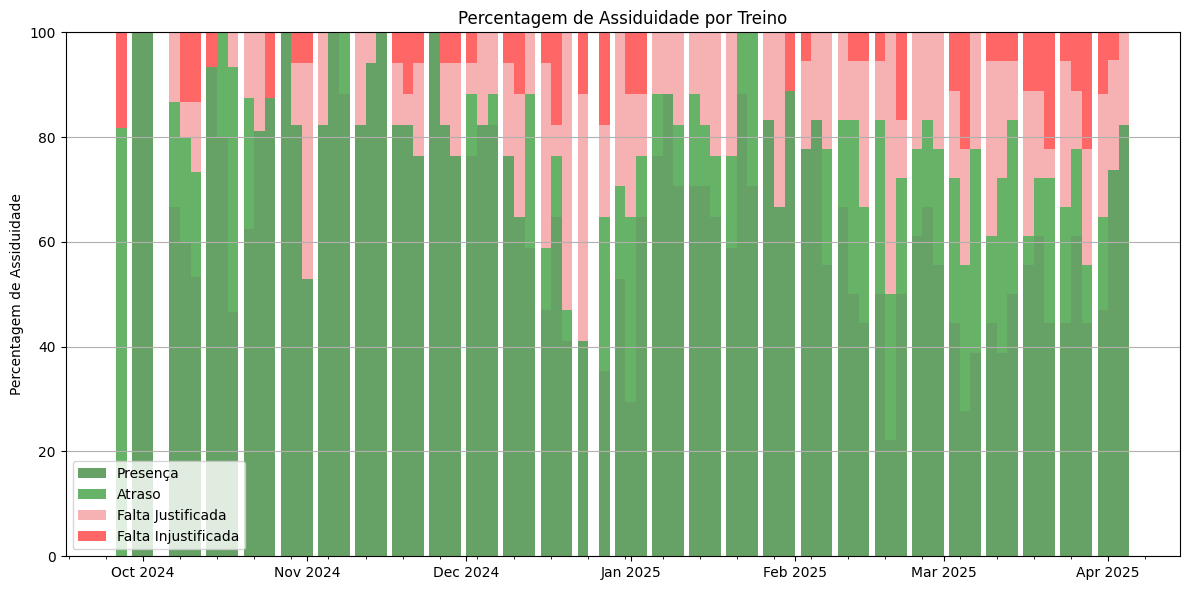

## Assiduidade média mensal:

| Mês     | Assiduidade   |
|:--------|:--------------|
| 2024-09 | 90%           |
| 2024-10 | 88%           |
| 2024-11 | 85%           |
| 2024-12 | 70%           |
| 2025-01 | 83%           |
| 2025-02 | 76%           |
| 2025-03 | 68%           |
| 2025-04 | 78%           |

In [ ]:
#@title Análise da Assiduidade das Atletas

import pandas as pd
import matplotlib.pyplot as plt
# Install the required libraries
# !pip install google-auth-oauthlib==1.2.0 google-auth-httplib2==0.1.1 google-api-python-client==2.116.0

# Import necessary libraries
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
from IPython.display import Markdown, display
import re
import google
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# (If you want to use your personal account instead of a service account, use this method. The first time you will be asked to authenticate via Google)
from google.colab import auth
auth.authenticate_user()
creds = google.auth.default()[0]

# Step 2: Get the Google Sheet ID
# Replace with your Google Sheet ID
SPREADSHEET_ID = '1OMSrvA2ZWcH05i2w9FoFw2axjeIf0-3ME5btbbctn0U'

# Step 3: Build Google Sheet Service
service = build('sheets', 'v4', credentials=creds)

# Step 4: Get data from Google Sheet
# Replace 'Sheet1' with the name of the sheet you want to access. You can also specify a range of data
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range="'Presenças'!A2:DR22").execute()
values = result.get('values')

# Step 5: Create Pandas DataFrame
df = pd.DataFrame(values[1:], columns=values[0])


# Example: Load data from a Google Sheets DataFrame (already cleaned and loaded into `df`)
# Skip columns 3-7 and rows with empty player names
df = df.dropna(subset=['Athlete']).iloc[:, [0, 1] + list(range(7, df.shape[1]))]


# Extract dates from the first row and attendance data from subsequent rows
dates = pd.to_datetime(df.columns[2:].str.strip(), format='%d/%m/%y')  # Use the provided date format
attendance_data = df.iloc[1:, 2:]

attendance_data.columns = dates.tolist()

session_data = []

# Step 1: Calculate percentages for each session
for col in attendance_data.columns:

    total_attendance = attendance_data[col][attendance_data[col] != ''].count()  # Count non-empty cells for the session
    # print(f'{col}: Attendance: {total_attendance}')
    if total_attendance == 0:
        continue;

    counts = attendance_data[col].value_counts()

    p_percent = (counts.get('P', 0) / total_attendance) * 100
    l_percent = (counts.get('L', 0) / total_attendance) * 100
    e_percent = (counts.get('E', 0) / total_attendance) * 100
    u_percent = (counts.get('U', 0) / total_attendance) * 100


    # Append session data to the list
    session_data.append({
        'Date': col,
        'P': p_percent,
        'L': l_percent,
        'E': e_percent,
        'U': u_percent
    })


# Create the session_summary DataFrame from the collected data
session_summary = pd.DataFrame(session_data)

# Step 2: Plot the stacked bar chart
plt.figure(figsize=(12, 6))

# Adjust the 'width' parameter here
bar_width = 2  # Adjust this value to control bar width
alpha = 0.6

# Plot each attendance type as a stacked bar with specified width
plt.bar(session_summary['Date'], session_summary['P'], color='darkgreen', alpha=alpha, label='Presença', width=bar_width)
plt.bar(session_summary['Date'], session_summary['L'], bottom=session_summary['P'], color='green', alpha=alpha, label='Atraso', width=bar_width)
plt.bar(session_summary['Date'], session_summary['E'], bottom=session_summary['P'] + session_summary['L'], alpha=alpha, color='lightcoral', label='Falta Justificada', width=bar_width)
plt.bar(session_summary['Date'], session_summary['U'], bottom=session_summary['P'] + session_summary['L'] + session_summary['E'], color='red', alpha=alpha, label='Falta Injustificada', width=bar_width)

# Customize the chart
plt.title('Percentagem de Assiduidade por Treino')
# plt.xlabel('Dat')
plt.ylabel('Percentagem de Assiduidade')
# plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
plt.grid(axis='y')
plt.legend()
plt.tight_layout()



# Show the chart
plt.show()


# 1. Convert 'Date' column to datetime objects
session_summary['Date'] = pd.to_datetime(session_summary['Date'])

# 2. Calculate Total Attendance (P + L) for each session
session_summary['Total Attendance'] = session_summary['P'] + session_summary['L']

# 3. Group by month and calculate the average of 'Total Attendance'
monthly_attendance = session_summary.groupby(session_summary['Date'].dt.to_period('M'))['Total Attendance'].mean()

# 4. Reset index to make 'Date' a regular column
monthly_attendance = monthly_attendance.reset_index()

# 5. Rename columns for better readability
monthly_attendance.columns = ['Mês', 'Assiduidade']

# --- Updated part ---
# 6. Round 'Average Attendance' to the nearest integer and add '%'
monthly_attendance['Assiduidade'] = monthly_attendance['Assiduidade'].astype(int).astype(str) + '%'
# --- End of updated part ---

# 7. Display the Markdown table
monthly_attendance_md = monthly_attendance.to_markdown(index=False)
display(Markdown(f"## Assiduidade média mensal:\n\n{monthly_attendance_md}"))

## Inquéritos de Satisfação

Apesar de tentar sempre motivar as atletas a comunicar de forma aberta e honesta, torna-se importante criar espaços bem definidos para que isso aconteça.

Mensalmente é lançado um inquérito de satisfação às atletas, e trimestralmente para os pais.

A secção seguinte mostra os resultados.


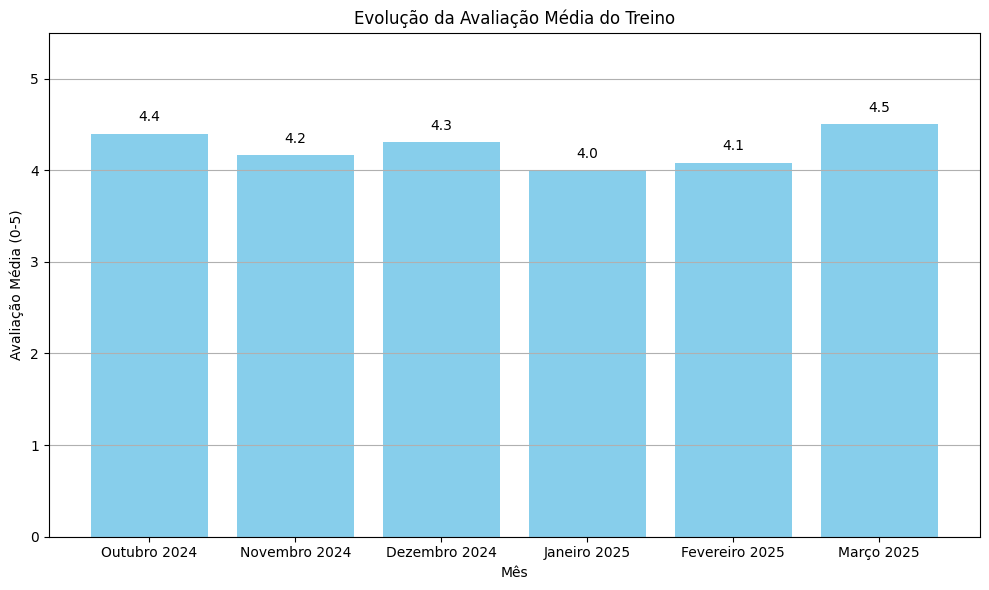

In [ ]:
#@title Evolução do rating atribuído pelas atletas

import pandas as pd
import matplotlib.pyplot as plt
import google
import gspread

from google.colab import auth
from google.auth.transport.requests import Request

# Step 1: Authenticate and authorize access to Google Sheets
auth.authenticate_user()
creds, _ = google.auth.default()

# Refresh the credentials if they are expired
if not creds.valid:
    creds.refresh(Request())

gc = gspread.authorize(creds)

# Step 2: Define the list of (month, Google Sheet ID) pairs
sheets_info = [
    {'month': 'Outubro 2024', 'sheet_id': '15mBtkhxqyfFRMkJfxp8XCqQAylUY3xpckwmCPgBcCQw'},
    {'month': 'Novembro 2024', 'sheet_id': '1cq9gxMnseV1AQGVv6u8-atLJYOlp-YIal3nx_fBxtiU'},
    {'month': 'Dezembro 2024', 'sheet_id': '1cS7Qe_38uxLVz3DDDOLmiRlHoEeEyf5Pq_0nHVsl5Ag'},
    {'month': 'Janeiro 2025', 'sheet_id': '10EtUMrocukt-ebNWtC1APtByCK93uk9E51zRTb9jXzM'},
    {'month': 'Fevereiro 2025', 'sheet_id': '1i3NJ92TrnZCzEm0Wb20rt07FnSZBxlGGk2LyhfCLrJk'},
    {'month': 'Março 2025', 'sheet_id': '1lCSS_wXcss_jBrnMRbgb5AhUsNMPxTYFqEls1DyYxyc'}
]

# Initialize a list to store the average rating per month
monthly_avg_ratings = []

# Step 3: Iterate over the sheets and calculate the average rating
for info in sheets_info:
    month = info['month']
    sheet_id = info['sheet_id']

    # Open the Google Sheet and load data
    worksheet = gc.open_by_key(sheet_id).sheet1
    data = worksheet.get_all_records()
    df = pd.DataFrame(data)

    # Calculate the average rating for the month
    avg_rating = df.iloc[:, 1].mean()
    monthly_avg_ratings.append({'Month': month, 'Average Rating': avg_rating})

# Step 4: Convert the list to a DataFrame
ratings_df = pd.DataFrame(monthly_avg_ratings)

# Step 5: Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(ratings_df['Month'], ratings_df['Average Rating'], color='skyblue')

# Step 6: Add labels on top of the bars (in Portuguese)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{round(yval, 1)}', ha='center', va='bottom')

plt.title('Evolução da Avaliação Média do Treino')  # Title in Portuguese
plt.xlabel('Mês')  # X-axis label in Portuguese
plt.ylabel('Avaliação Média (0-5)')  # Y-axis label in Portuguese
plt.ylim(0, 5.5)
plt.grid(axis='y')
plt.tight_layout()


# Aplicação e Evolução


## Mesociclos

A abordagem ao trabalho é organizado por mesociclos de 3 semanas, que focam no trabalho prioritário que tem de ser feito. A periodização foi escolhida por parecer um bom balanço entre a necessidade de aprendizagem de potenciais novos exercícios e a constante necessidade de trabalhar áreas complementares.

Na fase de desenvolvimento em que as atletas se encontram, decidi focar em 3 mesocíclos em particular:

* Serviço - receção
* KI
* KII

Como referido anteriormente, há uma opção latente de apostar na repetição para promover a assimilação psico-motora dos diferentes movimentos, pelo que há uma estrutura comum que atravessa todos os mesociclos; mas também há uma incidência maior na especificidade do mesociclo em causa.

Como exemplo, apesar de em todos os treinos haver uma componente de treino de serviço, no mesociclo de _Serviço-Receção_ há um foco maior na receção a serviços difíceis, enquanto que em KI há um foco maior no _side-out_, com colocação de bolas um pouco mais facilitadas.


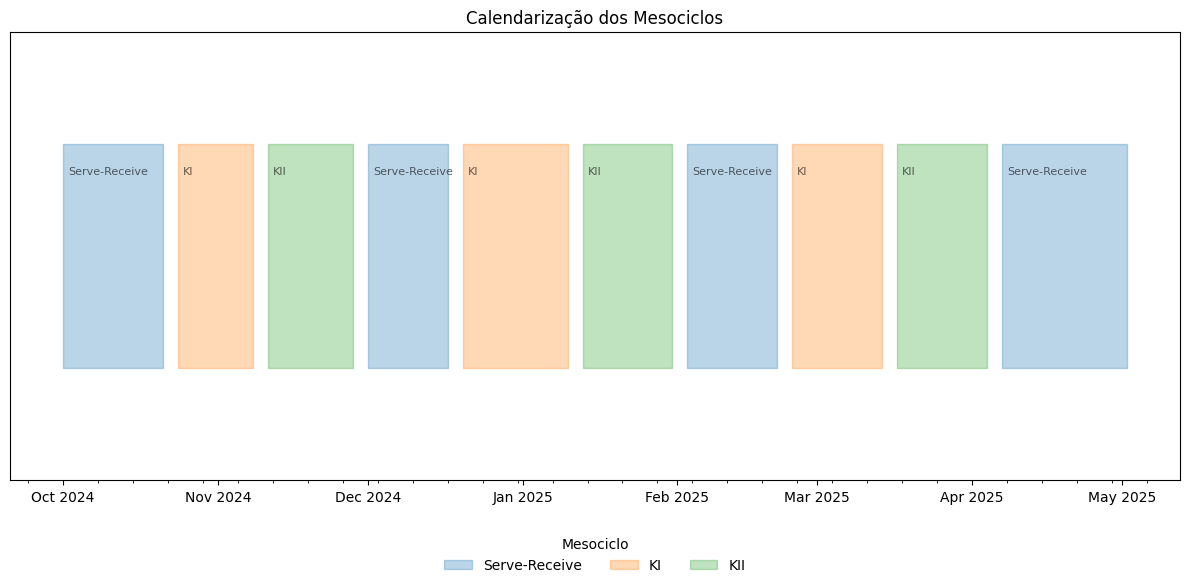

In [ ]:
#@title Calendarização dos Mesociclos

# Import necessary libraries
import pandas as pd
from IPython.display import Markdown, display
import re
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Define the updated mesocycles data
mesocycles = [
    ["Serve-Receive", "2024-10-01", "2024-10-21"],
    ["KI", "2024-10-24", "2024-11-08"],
    ["KII", "2024-11-11", "2024-11-28"],
    ["Serve-Receive", "2024-12-01", "2024-12-17"],
    ["KI", "2024-12-20", "2025-01-10"],
    ["KII", "2025-01-13", "2025-01-31"],
    ["Serve-Receive", "2025-02-03", "2025-02-21"],
    ["KI", "2025-02-24", "2025-03-14"],
    ["KII", "2025-03-17", "2025-04-04"],
    ["Serve-Receive", "2025-04-07", "2025-05-02"]
]

# Convert the mesocycles list into a DataFrame
mesocycle_df = pd.DataFrame(mesocycles, columns=["Mesocycle", "Start Date", "End Date"])
mesocycle_df["Start Date"] = pd.to_datetime(mesocycle_df["Start Date"])
mesocycle_df["End Date"] = pd.to_datetime(mesocycle_df["End Date"])

# Assign a unique category index to each mesocycle for consistent coloring
categories = {name: idx for idx, name in enumerate(mesocycle_df["Mesocycle"].unique())}
mesocycle_df["Category"] = mesocycle_df["Mesocycle"].map(categories)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))  # Increased width for better visualization

# Draw areas for each mesocycle
for idx, row in mesocycle_df.iterrows():
    ax.fill_betweenx(
        y=[-0.5, 0.5],  # Define the vertical position of the area
        x1=row["Start Date"],
        x2=row["End Date"],
        color=f"C{row['Category']}",  # Use consistent color per category
        alpha=0.3,  # Transparency for areas
        label=row["Mesocycle"] if row["Mesocycle"] not in ax.get_legend_handles_labels()[1] else None
    )
    # Add a label for the mesocycle in the top-left of the area with left padding
    ax.text(
        row["Start Date"] + pd.Timedelta(days=1),  # Add a small left padding to the start date
        0.4,                # Slightly below the top edge of the area
        row["Mesocycle"],
        ha='left', va='top', fontsize=8, alpha=0.6  # No background, just plain text
    )

# Formatting the chart
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))  # Show month and year (e.g., Oct 2024)
ax.xaxis.set_major_locator(mdates.MonthLocator())            # Major ticks for months
ax.xaxis.set_minor_locator(mdates.WeekdayLocator())          # Minor ticks for weeks

ax.set_ylim([-1, 1])  # Adjust vertical limits for visibility
ax.set_yticks([])     # Remove y-axis labels for clarity
plt.xticks(rotation=0)  # Keep dates horizontal
plt.title("Calendarização dos Mesociclos")
plt.legend(title="Mesociclo", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)
plt.tight_layout()

# Show the chart
plt.show()


## Resultados




### Resultados dos Jogos

Aqui estão os resultados dos jogos até agora:


| Date                | Opponent     | Location   | Match Score   | Result   | Sets                                | Video Link                           |
|:--------------------|:-------------|:-----------|:--------------|:---------|:------------------------------------|:-------------------------------------|
| 2024-11-03 | Sporting     | Away       | 0 - 3         | Loss     | (3-25, 6-25, 13-25)                 |                                      |
| 2024-11-10 | Sesimbra     | Home       | 0 - 3         | Loss     | (15-25, 13-25, 16-25)               | [Link](https://youtu.be/kIO4kf_FOAo) |
| 2024-11-17 | MTBA         | Home       | 0 - 3         | Loss     | (12-25, 17-25, 7-25)                | [Link](https://youtu.be/q7v3x_S3nNo) |
| 2024-11-24 | Alverca      | Away       | 1 - 3         | Loss     | (15-25, 25-18, 15-25, 16-25)        | [Link](https://youtu.be/kIO4kf_FOAo) |
| 2024-12-01 | Famões       | Home       | 0 - 3         | Loss     | (11-25, 12-25, 11-25)               | [Link](https://youtu.be/1owqKSwnqMI) |
| 2024-12-07 | Sporting     | Home       | 0 - 3         | Loss     | (6-25, 14-25, 13-25)                | [Link](https://youtu.be/N_xVWuPt_9A) |
| 2024-12-08 | Sesimbra     | Away       | 0 - 3         | Loss     | (10-25, 14-25, 21-25)               | [Link](https://youtu.be/mu4TWg6qSXI) |
| 2024-12-15 | MTBA         | Away       | 0 - 3         | Loss     | (18-25, 15-25, 18-25)               | [Link](https://youtu.be/8NMf0PD-Vms) |
| 2025-01-05 | Alverca      | Home       | 3 - 0         | Win      | (25-21, 25-15, 26-24)               | [Link](https://youtu.be/JiAHgfUyZVU) |
| 2025-01-12 | Famões       | Away       | 0 - 3         | Loss     | (17-25, 18-25, 24-26)               | [Link](https://youtu.be/yZoem7PeX8Q) |
| 2025-01-26 | Pelamora     | Home       | 0 - 3         | Loss     | (12-25, 11-25, 11-25)               | [Link](https://youtu.be/Ir5fMAGkXbo) |
| 2025-02-01 | CNG B        | Away       | 0 - 3         | Loss     | (12-25, 12-25, 14-25)               | [Link](https://youtu.be/TIesuACMn24) |
| 2025-02-02 | Vale Cavala  | Home       | 0 - 3         | Loss     | (19-25, 10-25, 21-25)               | [Link](https://youtu.be/uUwNdPmSk64) |
| 2025-02-09 | AMSAC        | Away       | 3 - 2         | Win      | (13-25, 20-25, 25-21, 25-17, 15-12) | [Link](https://youtu.be/Pr71JX_baT0) |
| 2025-03-09 | Belenenses B | Home       | 0 - 3         | Loss     | (11-25, 24-26, 14-25)               | [Link](https://youtu.be/m8meMzxzTzs) |

### Evolução da pontuação

Para mostrar a evolução (ou não) da equipa, podemos analizar a relação entre
pontos marcados e sofridos por jogo. Isto é apenas representativo, uma vez que o
grau de dificuldade do adversário fará toda a diferença.



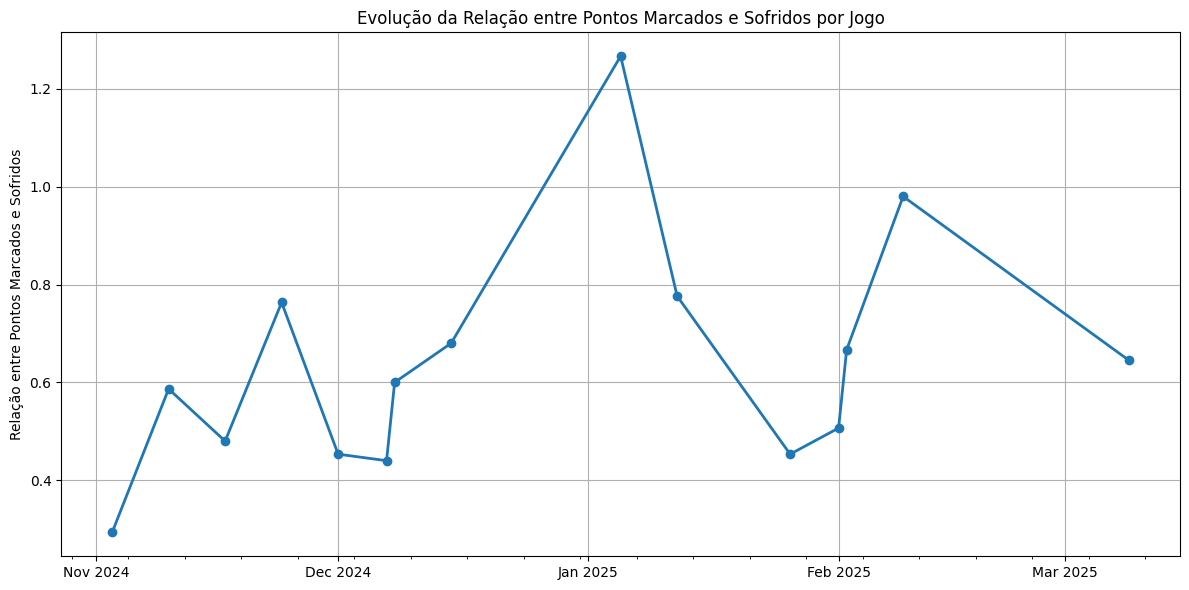

In [ ]:
#@title Jogos e Resultados

import pandas as pd
import re
import requests
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import Markdown, display

# URL of the CSV file
file_url = 'https://raw.githubusercontent.com/pmalves/coach-report-lv1/refs/heads/main/data/WebReports-Export.csv'

# Manually input missing match data
missing_match_data = [
    {"Location": "Lisbon", "Opponent": "Sporting", "Date": "2024-Nov-03", "Match Score": "0 - 3", "Sets": "(3-25, 6-25, 13-25)" , "Result": "Loss"}
]

# Youtube Video Links
video_links = [
    {"Date": "2024-11-10", "Video Link": "https://youtu.be/kIO4kf_FOAo"},
    {"Date": "2024-11-17", "Video Link": "https://youtu.be/q7v3x_S3nNo"},
    {"Date": "2024-11-24", "Video Link": "https://youtu.be/kIO4kf_FOAo"},
    {"Date": "2024-12-01", "Video Link": "https://youtu.be/1owqKSwnqMI"},
    {"Date": "2024-12-07", "Video Link": "https://youtu.be/N_xVWuPt_9A"},
    {"Date": "2024-12-08", "Video Link": "https://youtu.be/mu4TWg6qSXI"},
    {"Date": "2024-12-15", "Video Link": "https://youtu.be/8NMf0PD-Vms"},
    {"Date": "2025-01-05", "Video Link": "https://youtu.be/JiAHgfUyZVU"},
    {"Date": "2025-01-12", "Video Link": "https://youtu.be/yZoem7PeX8Q"},
    {"Date": "2025-01-26", "Video Link": "https://youtu.be/Ir5fMAGkXbo"},
    {"Date": "2025-02-01", "Video Link": "https://youtu.be/TIesuACMn24"},
    {"Date": "2025-02-02", "Video Link": "https://youtu.be/uUwNdPmSk64"},
    {"Date": "2025-02-09", "Video Link": "https://youtu.be/Pr71JX_baT0"},
    {"Date": "2025-03-09", "Video Link": "https://youtu.be/m8meMzxzTzs"},
    {"Date": "2025-03-23", "Video Link": "https://youtu.be/CKffUTN40Wg"},
    {"Date": "2025-03-30", "Video Link": "https://youtu.be/NLthq2c1j7o"},
    {"Date": "2025-04-03", "Video Link": "https://youtu.be/ZDTL7fSDzw0"}
]


# Fetch the file content from the URL
response = requests.get(file_url)
raw_data = response.text.splitlines()

# Initialize lists for parsed data
matches = []  # To store match-level data
games = []    # To store game-level data
player_stats_game = []  # Player statistics per game
player_stats_match = []  # Player statistics per match

current_match_id = 0  # To track match ID
current_game_number = 0  # To track game number within a match
inside_game_block = False  # To track if we are inside a game block

# Regular expression patterns for identifying blocks
game_pattern = re.compile(r"GAME(\d+): (.+)-(.+)-(\d{4}-\w{3}-\d{2}) \((\d+ - \d+)\)")
match_pattern = re.compile(r"MATCH: (.+)-(.+)-(\d{4}-\w{3}-\d{2})")
aggregate_pattern = re.compile(r"AGGREGATE")

# Friendly names mapping
friendly_names = {
"PLAYER_NUM": "Player Number",
"PLAYER_NAME": "Player Name",
"GAMES_PLAYED": "Games Played",
"POINTS_SCORED_ON_SERVE": "Points Scored on Serve",
"PT_SCORE_PERCENT": "Serve Score Percentage",
"ACES": "Aces",
"SERVE_ATTEMPTS": "Serve Attempts",
"SERVE_ERRORS": "Serve Errors",
"SERVE_ERROR_PERCENT": "Serve Error Percentage",
"SERVE_NET_POINTS": "Serve Net Points",
"PASS_RATING": "Pass Rating",
"PASS_ATTEMPTS": "Pass Attempts",
"SERVE_RCV_ERRORS": "Serve-Receive Errors",
"COMBINED_KILLS": "Combined Kills",
"COMBINED_KILL_ERRORS": "Combined Kill Errors",
"ATTACK_NET_POINTS": "Attack Net Points",
"HITTING_EFFICIENCY": "Hitting Efficiency",
"COMBINED_KILL_PERCENT": "Combined Kill Percentage",
"HITS_STILL_IN_PLAY": "Hits Still in Play",
"COMBINED_KILL_ATTEMPTS": "Combined Kill Attempts",
"ASSISTS": "Assists",
"BALL_HANDLING": "Ball Handling",
"SETTING_ERRORS": "Setting Errors",
"BLOCKS": "Blocks",
"BLOCK_ERRORS": "Block Errors",
"NET_BLOCKS": "Net Blocks",
"DIG_ERRORS": "Dig Errors",
"DIGS": "Digs",
"DIG_ERROR_PERCENT": "Dig Error Percentage",
"FAULTS": "Faults",
"SERVE_ATTEMPTS_PER_GAME": "Serve Attempts per Game",
"SERVE_ERRORS_PER_GAME": "Serve Errors per Game",
"ACES_PER_GAME": "Aces per Game",
"POINTS_SCORED_ON_SERVE_PER_GAME": "Points Scored on Serve per Game",
"PASS_ATTEMPTS_PER_GAME": "Pass Attempts per Game",
"SERVE_RCV_ERRORS_PER_GAME": "Serve-Receive Errors per Game",
"COMBINED_KILLS_PER_GAME": "Combined Kills per Game",
"COMBINED_KILL_ERRORS_PER_GAME": "Combined Kill Errors per Game",
"ATTACK_NET_POINTS_PER_GAME": "Attack Net Points per Game",
"HITTING_EFFICIENCY_PER_GAME": "Hitting Efficiency per Game",
"HITS_STILL_IN_PLAY_PER_GAME": "Hits Still in Play per Game",
"COMBINED_KILL_ATTEMPTS_PER_GAME": "Combined Kill Attempts per Game",
"BLOCKS_PER_GAME": "Blocks per Game",
"BLOCK_ERRORS_PER_GAME": "Block Errors per Game",
"NET_BLOCKS_PER_GAME": "Net Blocks per Game",
"DIG_ERRORS_PER_GAME": "Dig Errors per Game",
"DIGS_PER_GAME": "Digs per Game",
"FAULTS_PER_GAME": "Faults per Game"
}


# Parse the file
for line in raw_data:
    line = line.strip()

    # Check for the start of a new game block
    game_match = game_pattern.match(line)
    if game_match:
        if game_match.group(1) == '1':  # If it's GAME1, start a new match
            current_match_id += 1
        game_number = int(game_match.group(1))
        location = game_match.group(2)
        opponent = game_match.group(3)
        date = game_match.group(4)
        set_score = game_match.group(5).replace(' ', '')

        current_game = {
            'Match_ID': current_match_id,
            'Game_Number': game_number,
            'Location': location,
            'Opponent': opponent,
            'Date': date,
            'Set_Score': set_score
        }
        games.append(current_game)
        current_game_number = game_number
        inside_game_block = True  # We are now inside a game block
        continue

    # Check for the start of a match block
    match_match = match_pattern.match(line)
    if match_match:
        location = match_match.group(1)
        opponent = match_match.group(2)
        date = match_match.group(3)

        current_match = {
            'Match_ID': current_match_id,
            'Location': location,
            'Opponent': opponent,
            'Date': date
        }
        matches.append(current_match)
        inside_game_block = False  # We are now inside a match block
        continue

    # Check for the start of the aggregate block
    if aggregate_pattern.match(line):
        break  # Stop parsing at the aggregate block

    # Check for player statistics (header or data lines)
    if line.startswith("PLAYER_NUM"):
        player_stats_header = line.split(",")
        continue  # Skip header line

    if re.match(r"\d{1,2},", line):  # Player statistics data line
        player_data = line.split(",")
        if inside_game_block:
            player_data_dict = dict(zip(player_stats_header, player_data))
            player_data_dict['Match_ID'] = current_match_id
            player_data_dict['Game_Number'] = current_game_number
            player_stats_game.append(player_data_dict)
        else:
            player_data_dict = dict(zip(player_stats_header, player_data))
            player_data_dict['Match_ID'] = current_match_id
            player_stats_match.append(player_data_dict)
        continue

    # Check for team statistics (special player "(team)")
    if line.startswith(",(team)"):
        team_data = line.split(",")
        team_data_dict = dict(zip(player_stats_header, team_data))
        team_data_dict['Player Name'] = "(team)"
        if inside_game_block:
            team_data_dict['Match_ID'] = current_match_id
            team_data_dict['Game_Number'] = current_game_number
            player_stats_game.append(team_data_dict)
        else:
            team_data_dict['Match_ID'] = current_match_id
            player_stats_match.append(team_data_dict)
        continue

# Convert parsed data into DataFrames
games_df = pd.DataFrame(games)
matches_df = pd.DataFrame(matches)
player_stats_game_df = pd.DataFrame(player_stats_game)
player_stats_match_df = pd.DataFrame(player_stats_match)

# Function to calculate match score and result based on game scores
def calculate_match_score_and_result(match_id, games_df):
    # Filter games belonging to the current match
    match_games = games_df[games_df['Match_ID'] == match_id]

    # Count the number of games won by each team
    team_wins = sum([1 for score in match_games['Set_Score'] if int(score.split('-')[0]) > int(score.split('-')[1])])
    opponent_wins = len(match_games) - team_wins  # Total games minus team wins

    match_score = f"{team_wins} - {opponent_wins}"
    result = "Win" if team_wins > opponent_wins else "Loss"

    return match_score, result

# Apply the function to each match to calculate the Match Score and Result
matches_df['Match Score'], matches_df['Result'] = zip(*matches_df['Match_ID'].apply(lambda x: calculate_match_score_and_result(x, games_df)))

# Function to get the set results for each match
def get_sets_for_match(match_id, games_df):
    # Filter games belonging to the current match
    match_games = games_df[games_df['Match_ID'] == match_id]
    # Extract the set scores and join them with commas
    sets = ", ".join(match_games['Set_Score'].tolist())
    return f'({sets})'

# Apply the function to generate the "Sets" column
matches_df['Sets'] = matches_df['Match_ID'].apply(lambda x: get_sets_for_match(x, games_df))


# Adding missing_match_data
# Step 1: Convert missing_match_data to a DataFrame
missing_match_df = pd.DataFrame(missing_match_data)


# Step 2: Append missing_match_df to matches_df
matches_df = pd.concat([matches_df, missing_match_df], ignore_index=True)

# Step 3: Convert the Date column to datetime type
matches_df['Date'] = pd.to_datetime(matches_df['Date'], format='%Y-%b-%d')

# Step 4: Sort matches_df by Date
matches_df = matches_df.sort_values(by='Date').reset_index(drop=True)

# Step 5: Classify games as "Home" or "Away" in both matches_df and games_df
home_locations = ['Ericeira', 'Carvoeira']  # Define home locations
matches_df['Location'] = matches_df['Location'].apply(lambda loc: 'Home' if loc in home_locations else 'Away')
games_df['Location'] = games_df['Location'].apply(lambda loc: 'Home' if loc in home_locations else 'Away')

# Step 5.5 - Get video link

# Convert the list to a DataFrame
video_links_df = pd.DataFrame(video_links)
video_links_df['Date'] = pd.to_datetime(video_links_df['Date'])  # Ensure date format matches

# Merge video links into matches_df
matches_df = matches_df.merge(video_links_df, on='Date', how='left')
# Replace full URLs with Markdown links
matches_df['Video Link'] = matches_df['Video Link'].apply(
    lambda url: f"[Link]({url})" if pd.notna(url) else ""
)


# Step 6: Formatting date format
#matches_df['Date'] = matches_df['Date'].dt.strftime('%Y-%m-%d')
# games_df['Date'] = games_df['Date'].dt.strftime('%Y-%b-%d')

# Let's not convert the data to the correct format:
# List of columns to convert to numeric (ignoring percentage columns for now)
numeric_columns = [
    "PLAYER_NUM", "GAMES_PLAYED", "POINTS_SCORED_ON_SERVE", "ACES", "SERVE_ERRORS",
    "SERVE_NET_POINTS", "PASS_RATING", "PASS_ATTEMPTS", "SERVE_RCV_ERRORS", "COMBINED_KILLS",
    "COMBINED_KILL_ERRORS", "ATTACK_NET_POINTS", "HITTING_EFFICIENCY", "HITS_STILL_IN_PLAY",
    "COMBINED_KILL_ATTEMPTS", "ASSISTS", "BALL_HANDLING", "SETTING_ERRORS", "BLOCKS",
    "BLOCK_ERRORS", "NET_BLOCKS", "DIG_ERRORS", "DIGS", "FAULTS"
]

# Convert columns in player_stats_game_df to numeric where applicable
player_stats_game_df[numeric_columns] = player_stats_game_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Convert columns in player_stats_match_df to numeric where applicable
player_stats_match_df[numeric_columns] = player_stats_match_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Skip percentage columns by converting them to float (proportions)
# percentage_columns = ["PT_SCORE_PERCENT", "SERVE_ERROR_PERCENT", "DIG_ERROR_PERCENT"]
# for col in percentage_columns:
#     player_stats_game_df[col] = player_stats_game_df[col].str.replace('%', '').astype(float) / 100
#     player_stats_match_df[col] = player_stats_match_df[col].str.replace('%', '').astype(float) / 100

# Calculate the SERVE_ATTEMPTS

# Step 1: Convert "SERVE_ERROR_PERCENT" to a numeric value (proportion)
# Replace empty strings with NaN before converting to float
player_stats_game_df['SERVE_ERROR_PERCENT'] = player_stats_game_df['SERVE_ERROR_PERCENT'].replace('', np.nan).str.replace('%', '').astype(float)

# Step 2: Calculate "SERVE_ATTEMPTS" using the formula
player_stats_game_df['SERVE_ATTEMPTS'] = player_stats_game_df.apply(
    lambda row: row['POINTS_SCORED_ON_SERVE'] if pd.isna(row['SERVE_ERROR_PERCENT']) or row['SERVE_ERROR_PERCENT'] == 0
    else row['SERVE_ERRORS'] / (row['SERVE_ERROR_PERCENT'] / 100),
    axis=1
).round().astype(int)

# Step 3: Handle the same calculation for player_stats_match_df
# Replace empty strings with NaN before converting to float
player_stats_match_df['SERVE_ERROR_PERCENT'] = player_stats_match_df['SERVE_ERROR_PERCENT'].replace('', np.nan).str.replace('%', '').astype(float)

player_stats_match_df['SERVE_ATTEMPTS'] = player_stats_match_df.apply(
    lambda row: row['POINTS_SCORED_ON_SERVE'] if pd.isna(row['SERVE_ERROR_PERCENT']) or row['SERVE_ERROR_PERCENT'] == 0
    else row['SERVE_ERRORS'] / (row['SERVE_ERROR_PERCENT'] / 100),
    axis=1
).round().astype(int)


# Create the stats_match object
# Step 1: Identify numeric columns to aggregate (exclude "PLAYER_NUM" and "GAMES_PLAYED")
columns_to_aggregate = player_stats_match_df.select_dtypes(include=['number']).columns.difference(['Player Number', 'Games Played', 'Match_ID'])

# Step 2: Group by "Match_ID" and sum the numeric columns
stats_match_df = player_stats_match_df.groupby('Match_ID')[columns_to_aggregate].sum().reset_index()

# Step 3: Calculate back the serve error percentage
stats_match_df['SERVE_ERROR_PERCENT'] = (stats_match_df['SERVE_ERRORS'] / stats_match_df['SERVE_ATTEMPTS'] * 100)

# Step 4: Merge stats_match_df with matches_df on 'Match_ID' to recover match data
stats_match_df = stats_match_df.merge(
    matches_df[['Match_ID', 'Date', 'Opponent', 'Location', 'Match Score', 'Result', 'Sets']],
    on='Match_ID',
    how='left'
)

# Now let's add a few _PER_GAME stats
# Step 1: Ensure 'Num_Sets' column exists in stats_match_df
if 'Num_Sets' not in stats_match_df.columns:
    matches_df['Num_Sets'] = matches_df['Sets'].apply(lambda x: len(x.split(',')))
    stats_match_df = stats_match_df.merge(matches_df[['Match_ID', 'Num_Sets']], on='Match_ID', how='left')

# Step 2: List of columns to normalize
per_game_columns = [
    "SERVE_ATTEMPTS", "ACES", "SERVE_ERRORS","POINTS_SCORED_ON_SERVE","PASS_ATTEMPTS", "SERVE_RCV_ERRORS", "COMBINED_KILLS", "COMBINED_KILL_ERRORS",
    "ATTACK_NET_POINTS", "HITTING_EFFICIENCY", "HITS_STILL_IN_PLAY", "COMBINED_KILL_ATTEMPTS",
    "BLOCKS", "BLOCK_ERRORS", "NET_BLOCKS", "DIG_ERRORS", "DIGS", "FAULTS"
]

# Step 3: Normalize columns by the number of sets and create new columns
for col in per_game_columns:
    stats_match_df[f"{col}_PER_GAME"] = stats_match_df[col] / stats_match_df['Num_Sets']




# Diplay the markdown result of the games
matches_table_md = matches_df[['Date','Opponent','Location', 'Match Score', 'Result', 'Sets', 'Video Link']].to_markdown(index=False).replace(" 00:00:00","")

# Sanitizing the table and translating it
# Rename columns using friendly names
player_stats_game_df.rename(columns=friendly_names, inplace=True)
player_stats_match_df.rename(columns=friendly_names, inplace=True)
stats_match_df.rename(columns=friendly_names, inplace=True)



# Step 6: Create formatted Markdown string
results_description_md = f"""

### Resultados dos Jogos

Aqui estão os resultados dos jogos até agora:


{matches_table_md}

### Evolução da pontuação

Para mostrar a evolução (ou não) da equipa, podemos analizar a relação entre
pontos marcados e sofridos por jogo. Isto é apenas representativo, uma vez que o
grau de dificuldade do adversário fará toda a diferença.

"""

display(Markdown(results_description_md))



# Let's plot the ratio between poits scored and allowed
# Step 1: Function to calculate total points scored and allowed from "Sets"
def calculate_total_points(sets_str):
    sets = sets_str.replace("(","").replace(")","").split(', ')
    points_scored = sum(int(score.split('-')[0]) for score in sets)
    points_allowed = sum(int(score.split('-')[1]) for score in sets)
    return points_scored, points_allowed

# Step 2: Apply the function to the "Sets" column to get total points
matches_df[['Total Points Scored', 'Total Points Allowed']] = matches_df['Sets'].apply(lambda x: pd.Series(calculate_total_points(x)))

# Step 3: Calculate the ratio of total points scored to total points allowed
matches_df['Points Scored / Allowed Ratio'] = matches_df['Total Points Scored'] / matches_df['Total Points Allowed']

# Step 4: Plot the line-dot chart
plt.figure(figsize=(12, 6))
plt.plot(matches_df['Date'], matches_df['Points Scored / Allowed Ratio'], marker='o', linestyle='-', linewidth=2)

# Step 5: Customize the chart
plt.title('Evolução da Relação entre Pontos Marcados e Sofridos por Jogo')
plt.ylabel('Relação entre Pontos Marcados e Sofridos')
# plt.xticks(rotation=45)
plt.grid(True)

# Use consistent date formatting for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Oct 2024"
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Major ticks for months
plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())  # Minor ticks for weeks

plt.tight_layout()

# Show the chart
plt.show()

# stats_match_df.columns


### Estatísticas e Evolução

Vamos agora tentar entender a evolução de métricas específicas do jogo, principalmente em relação aos mesociclos de trabalho efetuado.

Iremos estudar os seguintes elementos, que me parecem os mais relevantes para a fase onde a equipa está:

* Serviço
  * Percentagem de erros de serviço
  * Ases por set
* Receção
  * Erros de receção por set
* Ataque
  * Kills por Set
  * Tentativas de Kill por Set
* Defesa
  * Defesas por set
  * Erros na defesa por set
* Bloco
  * Blocos por set
  * Erros de bloco por set

_Nota: Para permitir uma melhor comparação sobre os números, a maior parte das métricas está normalizada no número de sets. Quando se lê "Kills per Game", o "game" é um set. É a terminologia do software SoloStats, utilizado para a recolha de estatísticas, onde "game" é um set e "match" é um jogo_




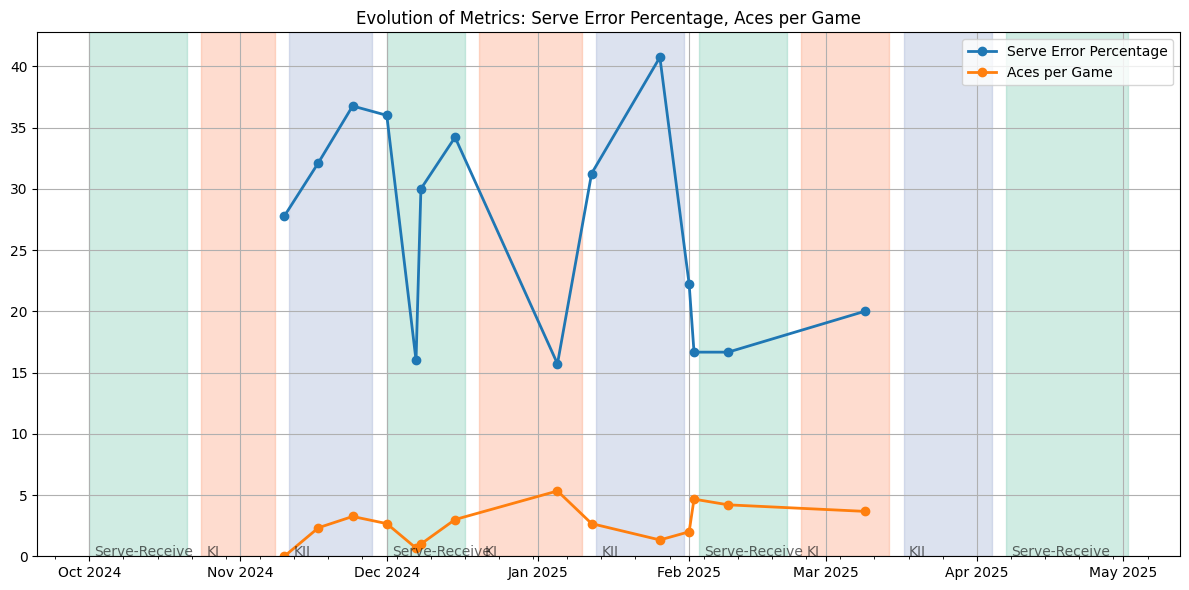

In [ ]:
#@title Serviço


import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pdimport
import seaborn as sns

# Mesocycle data is above


# Generate a dynamic color palette for unique phases
unique_phases = mesocycle_df['Mesocycle'].unique()
color_palette = sns.color_palette('Set2', len(unique_phases))  # Choose a palette with enough distinct colors
phase_colors = dict(zip(unique_phases, color_palette))  # Map each phase to a color

# Function to plot metrics with mesocycle areas and labels
def plot_metrics_with_mesocycles(stats_df, metrics, mesocycle_df):
    plt.figure(figsize=(12, 6))

    # Plot mesocycle areas with dynamic colors and labels inside the areas
    for _, row in mesocycle_df.iterrows():
        color = phase_colors[row['Mesocycle']]  # Get the color for the current phase
        plt.axvspan(row['Start Date'], row['End Date'], color=color, alpha=0.3)

        # Add the mesocycle label inside the area (top-left)
        plt.text(row['Start Date'] + pd.Timedelta(days=1), plt.gca().get_ylim()[1] * 0.9,
                 row['Mesocycle'], fontsize=10, color='black', alpha=0.6, ha='left', va='top')

    # Plot each metric as a dot-line chart
    for metric in metrics:
        plt.plot(stats_df['Date'], stats_df[metric], marker='o', linestyle='-', linewidth=2, label=metric)

    # Customize the chart
    plt.title(f"Evolution of Metrics: {', '.join(metrics)}")
    plt.ylim(bottom=0)
    # plt.xlabel('Date')
    # plt.ylabel('Value')
    # plt.xticks(rotation=45)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_minor_locator(mdates.WeekdayLocator())
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

    # Show the chart
    plt.show()

# Usage:
metrics = ["Serve Error Percentage","Aces per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


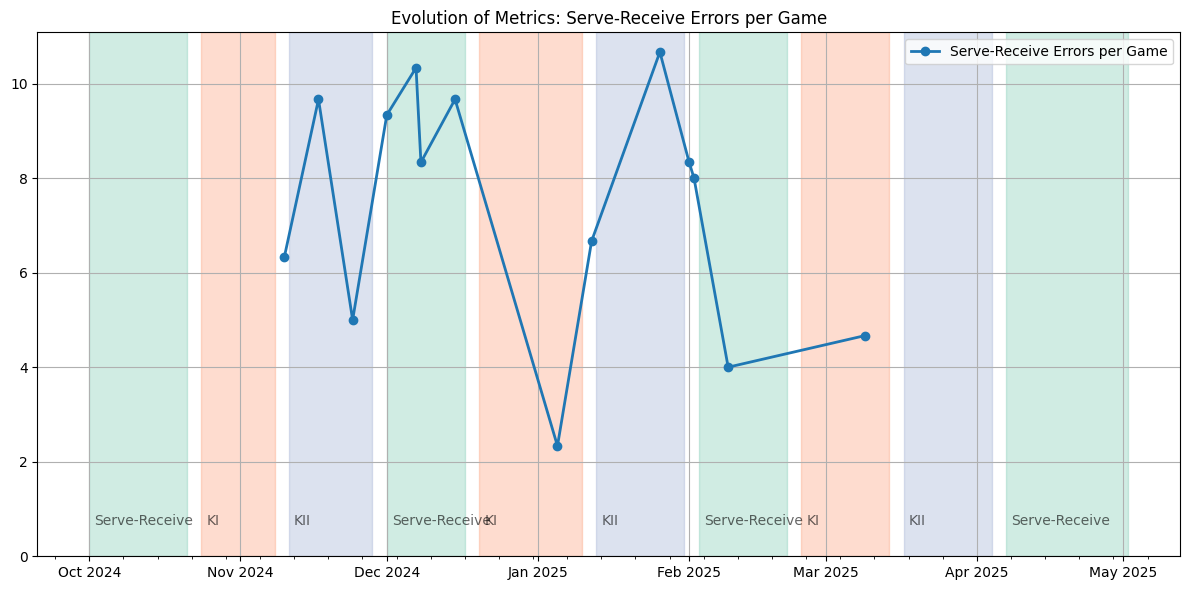

In [ ]:
#@title Receção

metrics = [
    # "Pass Attempts per Game",
    "Serve-Receive Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)



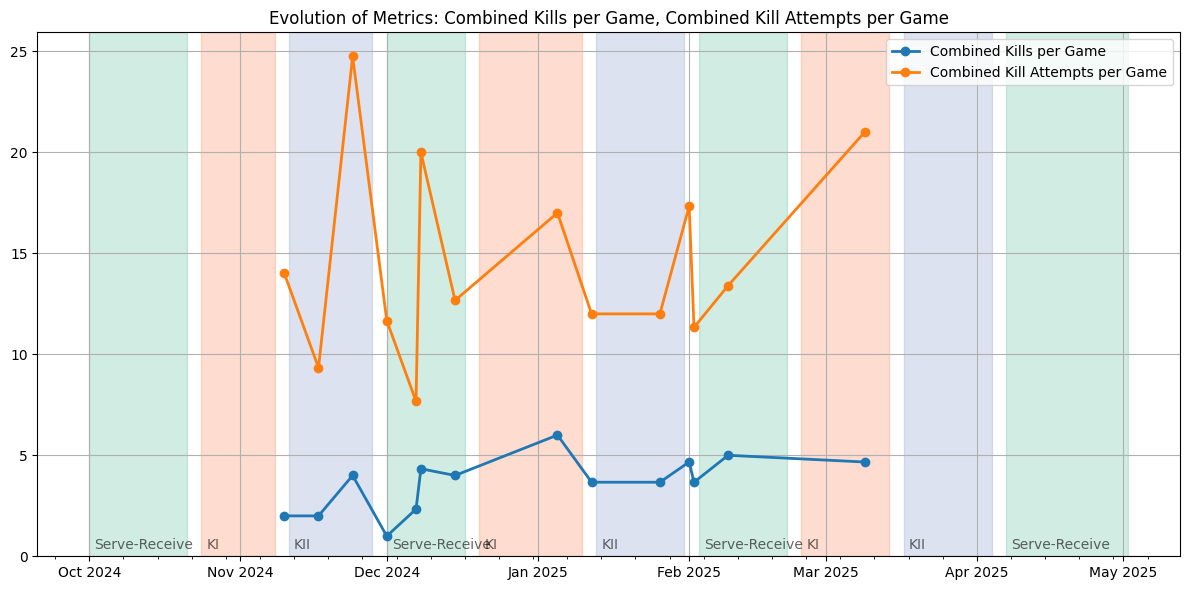

In [ ]:
#@title Ataque

# Usage:
metrics = ["Combined Kills per Game", "Combined Kill Attempts per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


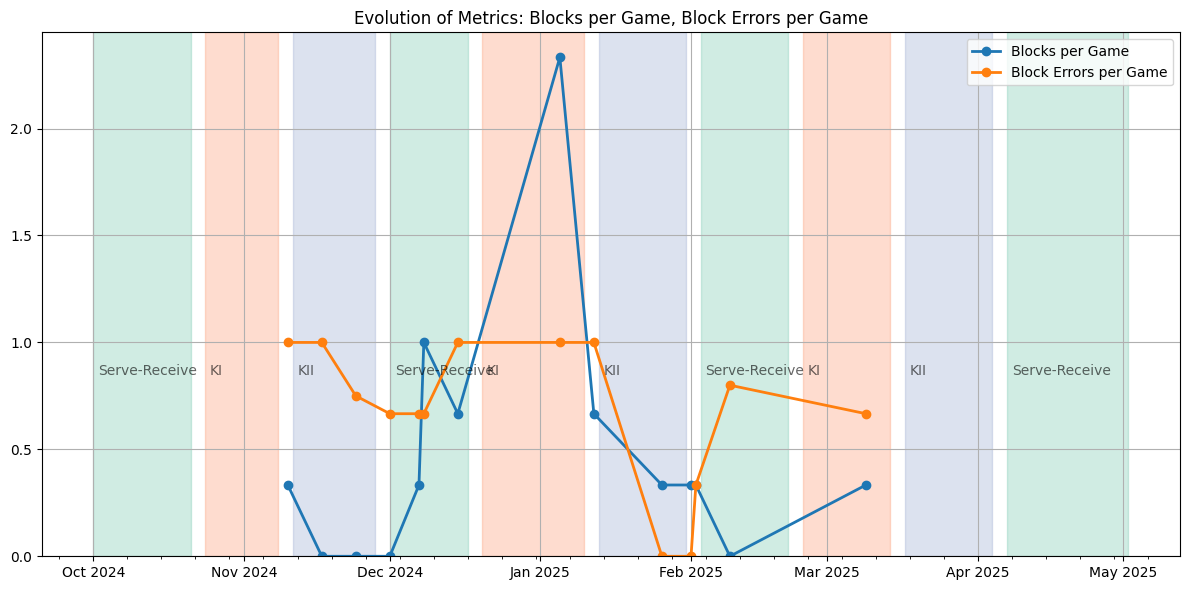

In [ ]:
#@title Bloco

# Usage:
metrics = ["Blocks per Game", "Block Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


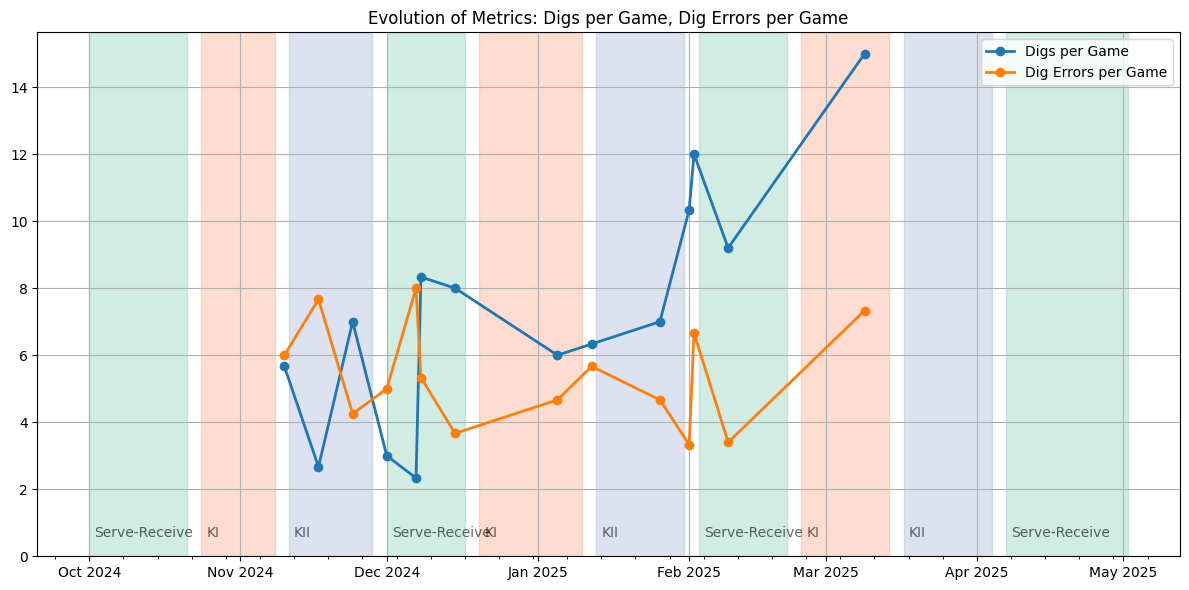

In [ ]:
#@title Defesa

# Usage:
metrics = ["Digs per Game", "Dig Errors per Game"]
plot_metrics_with_mesocycles(stats_match_df, metrics, mesocycle_df)


## Interpretação Pessoal

Apesar destas análises não terem em conta o grau de dificuldade do adversário, o que tem uma enormíssima implicação nos resultados, é inegável observar uma trajetória positiva em todos os elementos de jogo.

Não consigo, no entanto, ver uma relação direta entre o mesociclo de trabalho e o os resultados obtidos no período imediatamente após o seu término. Julgo que isso se deve ao facto de haverem imensas variáveis envolvidas, mas continuo a achar benéfico manter este método de trabalho.

# Apêndice


## Planos de treino
*(Anexar planos de treino detalhados como tabelas ou links para documentos.)*
